<h2>Bais-Varince trade off</h2>
<p> The bias–variance tradeoff is the property of a model that the variance of the parameter estimated across samples can be reduced by increasing the bias in the estimated parameters.</p>
<p>Bais : Inability of model to truly capture relationship between varibale pesent trainning data</p>
<p>Varience : Difference of fit in difference of data set</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Bias_and_variance_contributing_to_total_error.svg">

<h2>Overfitting & Under fitting</h2>
<p>Over-fitting: Training Error is low, test error is high</p>
<p>Under-fitting: Training Error is high, test error is low</p>    
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png">

<h1>To overcome above problem we have following method</h1>
<h2> Regularization 
<br> Bagging <br>
 Boosting </h2>

### Regularization
- Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. Using Regularization, we can fit our machine learning model appropriately on a given test set and hence reduce the errors in it.
- Type of regularization
- Rigde(L2)
- Lasso(L1)
- Elastic (combination Rigde & Lasso)

<img src ="https://miro.medium.com/max/1400/1*nrWncnoJ4V_BkzEf1pd4MA.webp">

#### Rigde Regularization
- Cost function = Loss + λ + Σ ||w||2
- Here,
- Loss = sum of squared residual
- λ = penalty
- w = slope of the curve

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [8]:
X=data.data
y=data.target

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [10]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [11]:
L.fit(X_train,y_train)

LinearRegression()

In [12]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [13]:
y_pred=L.predict(X_test)

In [15]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [16]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [18]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [19]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [20]:
y_pred1=R.predict(X_test)

In [21]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


In [ ]:
##### Vistualizatio ####

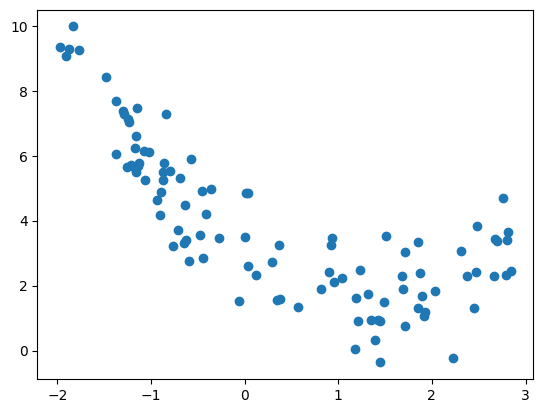

In [22]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

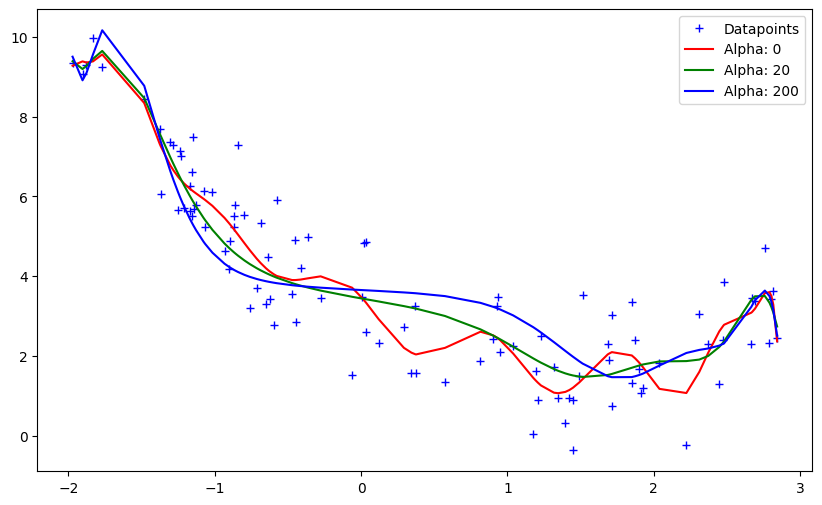

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
